# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


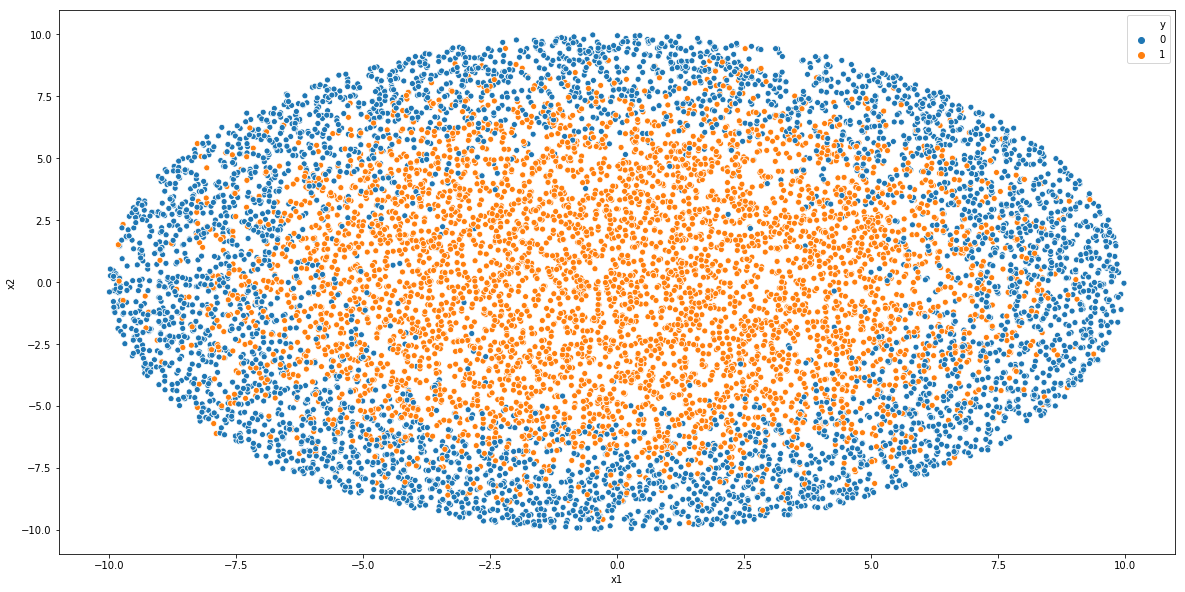

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

/home/care1e55/progz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность нашей модели 0.5093939393939394


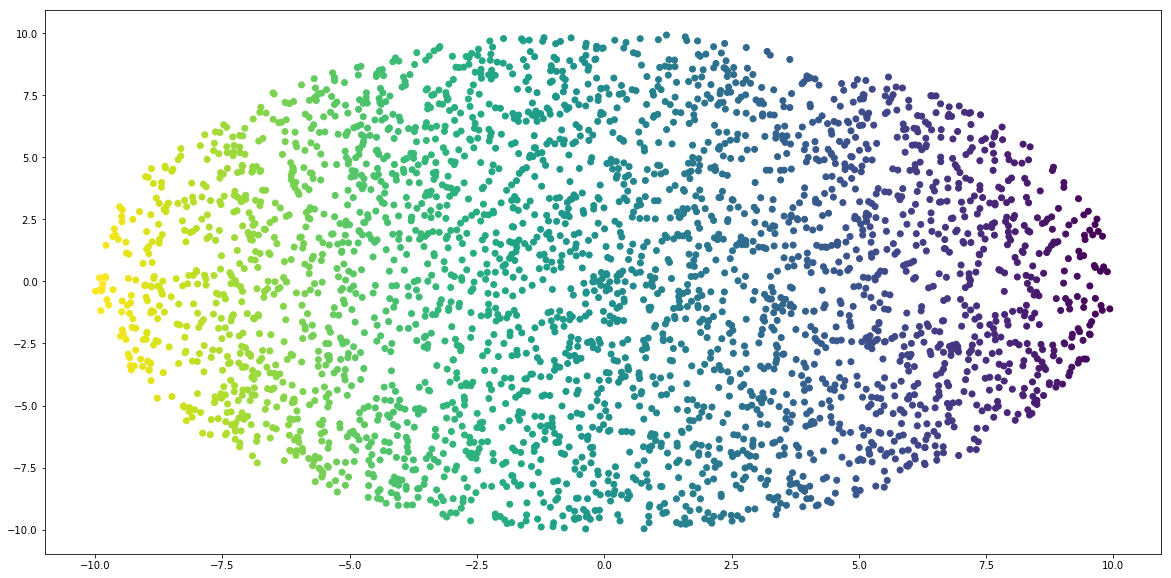

In [7]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression( )
model.fit(X_train, y_train)
predict_logit = model.predict(X_test)

predict_log_proba = model.predict_proba(X_test)[:,0]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

/home/care1e55/progz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность нашей модели 0.8384848484848485


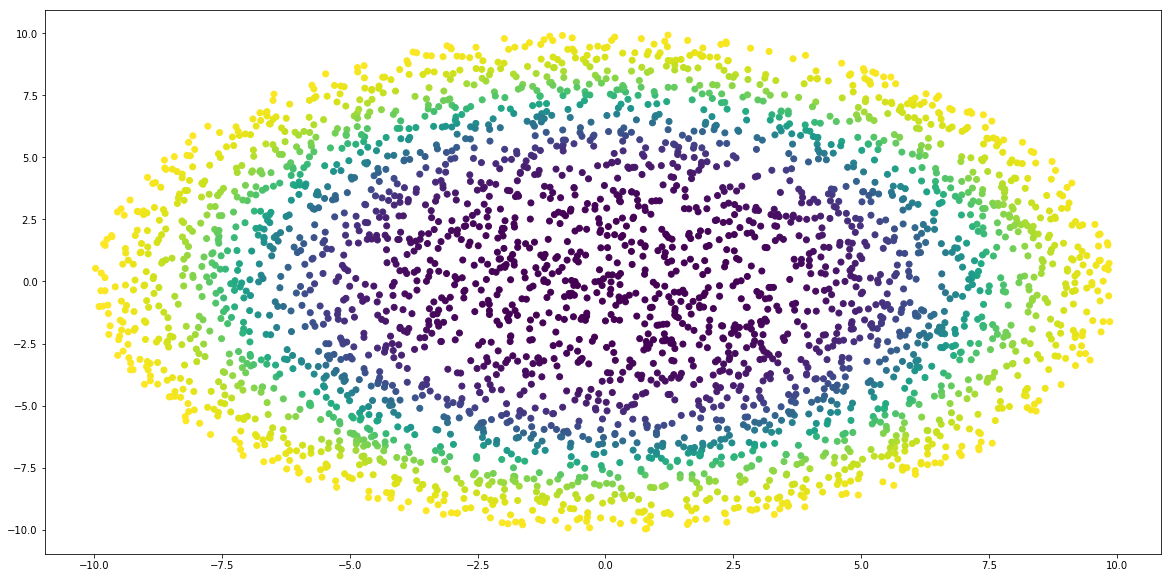

In [21]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = np.sqrt(df_new['x1']**2+df_new['x2']**2)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

model = LogisticRegression( )
model.fit(X_train_new, y_train_new)
predict_logit = model.predict(X_test_new)

predict_log_proba = model.predict_proba(X_test_new)[:,0]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.8084848484848485


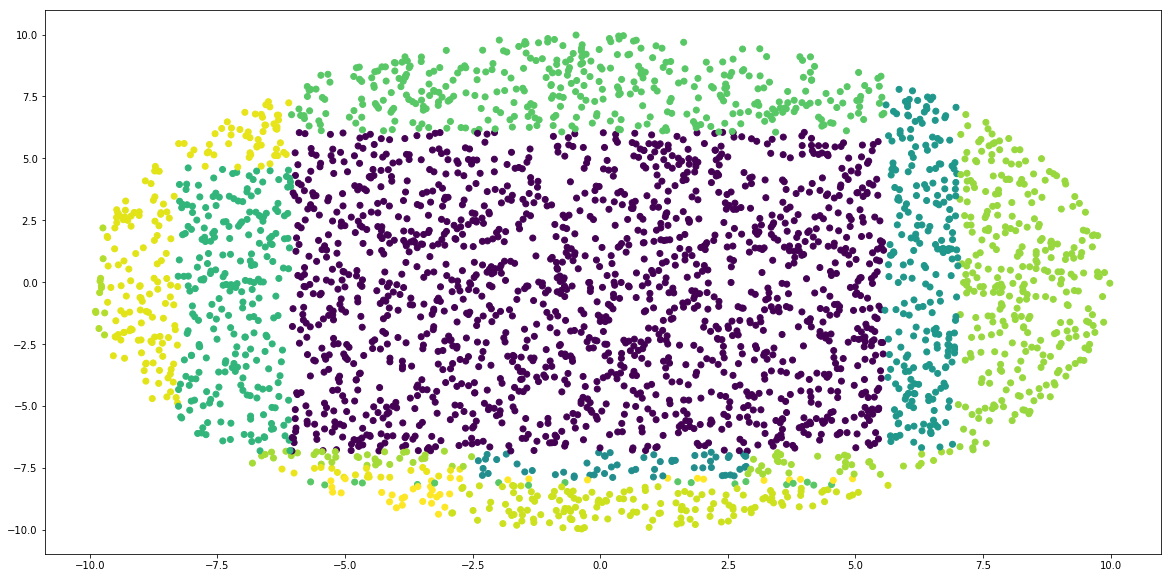

In [26]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
predict_tree = tree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = tree.predict_proba(X_test)[:,0]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

/home/care1e55/progz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Точность нашей модели 0.806969696969697


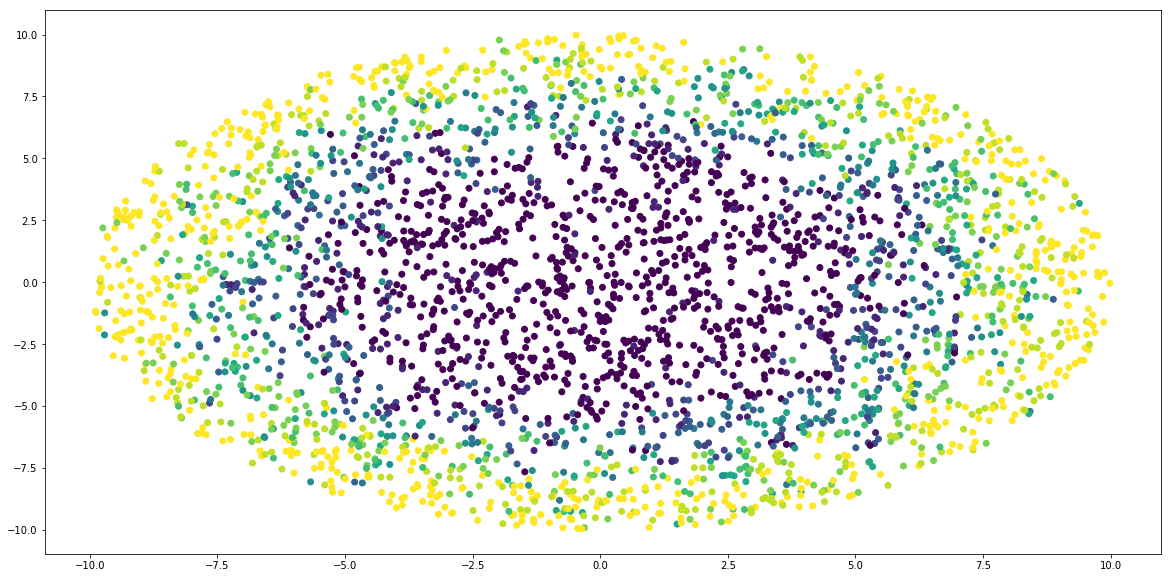

In [27]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
predict_forest = forest.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest.predict_proba(X_test)[:,0]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [10]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

2.0.0-alpha0
2.2.4-tf


In [49]:
# !pip install tensorflow==2.0.0-alpha0 

Train on 5360 samples, validate on 1340 samples
Epoch 1/100
5360/5360 [==============================] - 2s 384us/sample - loss: 0.6939 - accuracy: 0.4903 - val_loss: 0.6930 - val_accuracy: 0.5090
Epoch 2/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6930 - val_accuracy: 0.5090
Epoch 3/100
5360/5360 [==============================] - 0s 25us/sample - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6930 - val_accuracy: 0.5090
Epoch 4/100
5360/5360 [==============================] - 0s 24us/sample - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6932 - val_accuracy: 0.5090
Epoch 5/100
5360/5360 [==============================] - 0s 24us/sample - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6931 - val_accuracy: 0.5090
Epoch 6/100
5360/5360 [==============================] - 0s 24us/sample - loss: 0.6928 - accuracy: 0.5153 - val_loss: 0.6932 - val_accuracy: 0.5090
Epoch 7/100
5360/5360 [==============================] - 0s 24u

Epoch 56/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.3766 - accuracy: 0.8360 - val_loss: 0.3801 - val_accuracy: 0.8373
Epoch 57/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.3756 - accuracy: 0.8360 - val_loss: 0.3792 - val_accuracy: 0.8351
Epoch 58/100
5360/5360 [==============================] - 0s 24us/sample - loss: 0.3752 - accuracy: 0.8336 - val_loss: 0.3808 - val_accuracy: 0.8366
Epoch 59/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.3744 - accuracy: 0.8360 - val_loss: 0.3785 - val_accuracy: 0.8373
Epoch 60/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.3738 - accuracy: 0.8368 - val_loss: 0.3774 - val_accuracy: 0.8351
Epoch 61/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.3735 - accuracy: 0.8336 - val_loss: 0.3781 - val_accuracy: 0.8381
Epoch 62/100
5360/5360 [==============================] - 0s 23us/sample - loss: 0.3729 - accuracy: 0.8354

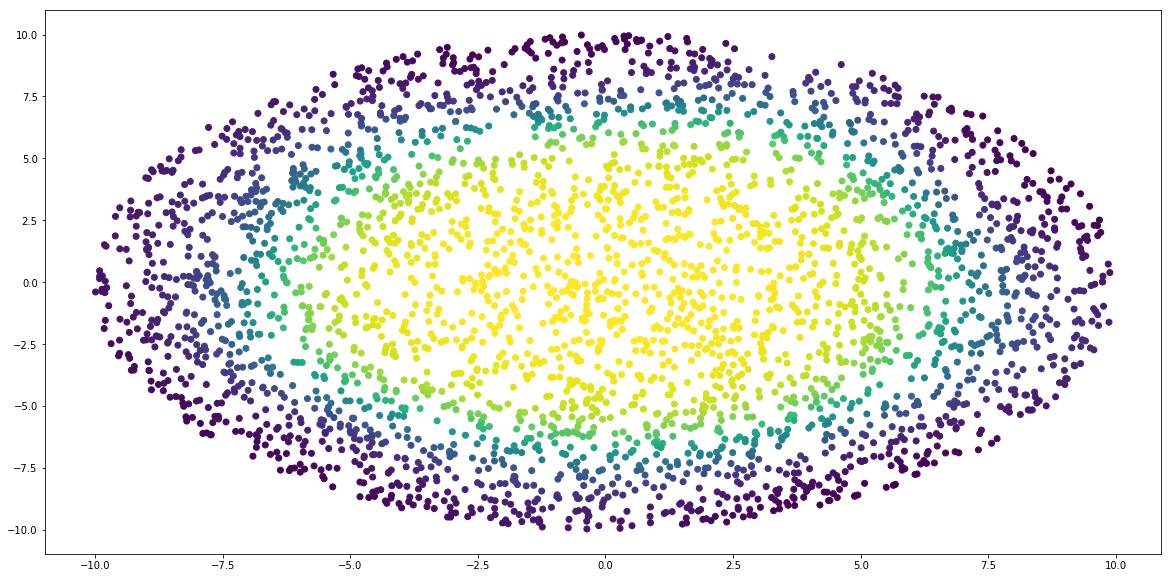

In [11]:
#########################################
# Ваш код

model = Sequential(name = 'myFistKerasNN')
model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
model.add(L.Activation('sigmoid'))
model.add(L.Dense(5, kernel_initializer='random_normal'))
model.add(L.Activation('sigmoid'))
model.add(L.Dense(1, activation='sigmoid', kernel_initializer = 'random_normal'))


optimizer = opt.Adam(lr=1e-3)

model.compile(loss = 'binary_crossentropy', 
              metrics=["accuracy"],
              optimizer=optimizer)


hist = model.fit(X_train, 
                 y_train, 
                 validation_split=0.2, 
                 epochs=100, 
                 verbose=1)

predict = model.predict(X_test)
predict_classes = model.predict_classes(X_test)

print(predict[:,0].shape, predict_classes[:,0].shape, y_test.shape)



print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict[:,0])
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)

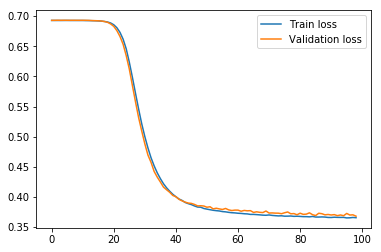

In [12]:
start = 1
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])